In [45]:
import os
import tarfile

from holoviews.plotting.bokeh.styles import alpha
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [46]:
fetch_housing_data()

/var/folders/ft/pkyxbgxd5qqcsz8hx6b9xk480000gn/T/ipykernel_73877/3046532945.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [47]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [48]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


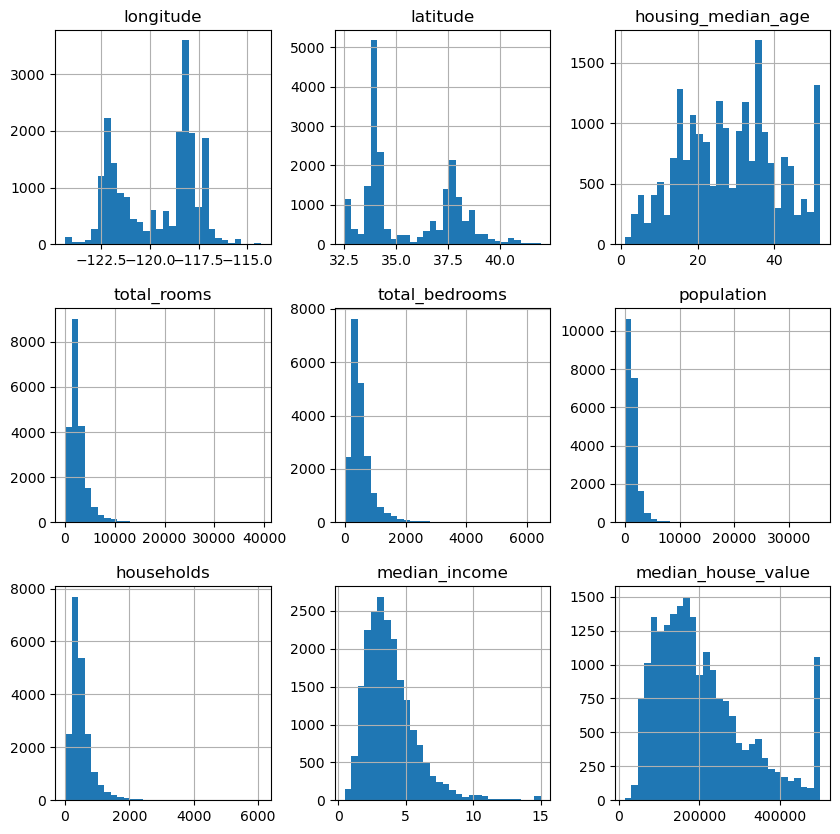

In [52]:
import matplotlib.pyplot as plt
housing.hist(bins=30, figsize=(10, 10))
plt.show()

### Создание испытатеnьного набора

In [53]:
import numpy as np
def split_train_test(data, test_ratio=0.2):
    shuffled_data = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    
    training_set = data.iloc[shuffled_data[:test_size]]
    test_set = data.iloc[shuffled_data[test_size:]]
    
    return training_set, test_set

In [54]:
training_set, test_set = split_train_test(housing)

In [55]:
print(f'Training set size: {len(training_set)}\nTesting set size: {len(test_set)}\nFull size: {len(housing)}')

Training set size: 4128
Testing set size: 16512
Full size: 20640


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [58]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing[['median_income', 'income_cat']]

,median_income,income_cat
0,8.3252,6.0
1,8.3014,6.0
2,7.2574,5.0
3,5.6431,4.0
4,3.8462,3.0
...,...,...
20635,1.5603,2.0
20636,2.5568,2.0
20637,1.7000,2.0
20638,1.8672,2.0


In [59]:
housing['income_cat'] = housing['income_cat'].where(housing['income_cat'] < 5, 5.0)
housing['income_cat'].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

In [60]:
housing[['median_income', 'income_cat']]

,median_income,income_cat
0,8.3252,5.0
1,8.3014,5.0
2,7.2574,5.0
3,5.6431,4.0
4,3.8462,3.0
...,...,...
20635,1.5603,2.0
20636,2.5568,2.0
20637,1.7000,2.0
20638,1.8672,2.0


In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

In [62]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [63]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [64]:
housing['income_cat'].value_counts()/len(housing)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

<Axes: >

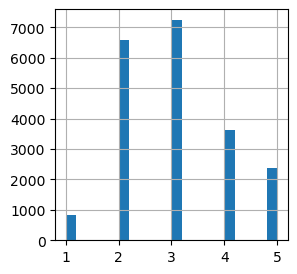

In [65]:
housing['income_cat'].hist(bins=20, figsize=(3, 3))

In [66]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace=True)

### Обнаружение и визуализация данных для понимания их сущности

In [67]:
housing = strat_train_set.copy()

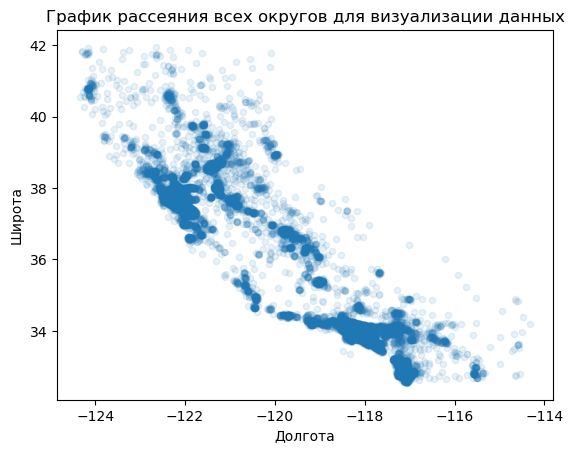

In [68]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('График рассеяния всех округов для визуализации данных')
plt.show()

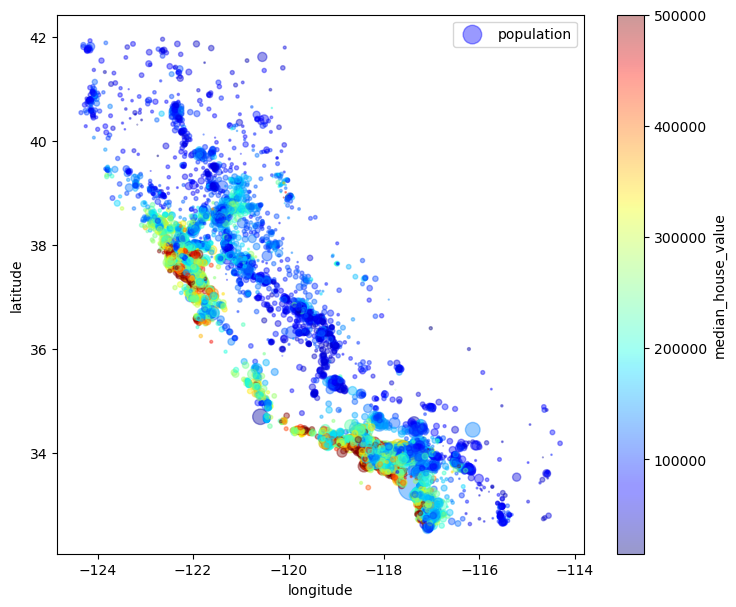

In [69]:
housing.plot(kind = 'scatter', 
             x = 'longitude',
             y = 'latitude',
             alpha = 0.4,
             
             s = housing['population']/100,
             label = 'population',
             
             figsize = (8.5, 7),
             c = 'median_house_value',
             cmap = plt.get_cmap('jet'),
             colorbar = True,
             )
plt.legend()
plt.show()

### Поиск связей

Поскольку набор данных не слишком большой, вы можете легко вычислить
стандартный коэффициент корреляции (standard correlation coe ff icient),
также называемый коэффициентом корреляции Пирсона (r) (Pearson'
s r),
между каждой парой атрибутов с применением метода corr ( ) :

##### Коэффициент корреляции колеблется от -1 до 1. Когда он близок к 1, это означает наличие сильной положительной корреляции; например, средняя стоимость дома имеет тенденцию увеличиваться с ростом медианного дохода. Когда коэффициент корреляции близок к -1, тогда существует сильная отрицательная корреляция;

In [70]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix['median_house_value']

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

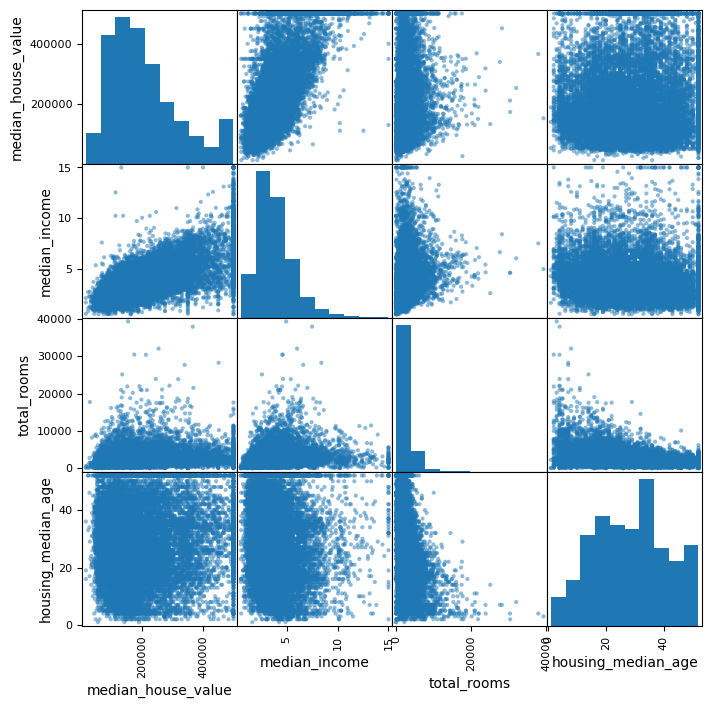

In [71]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(8, 8))

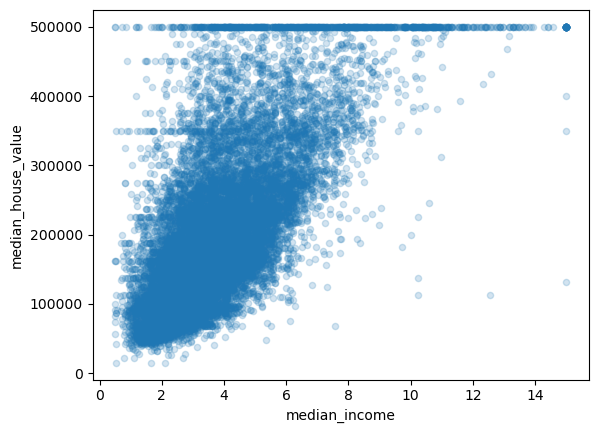

In [72]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2)
plt.show()

афик выявляет несколько фактов. Во-первых, корреляция действи-льно очень сильная; вы ясно видите тенденцию к повышению и точки не слишком рассеяны. Во-вторых, граница цены, которую мы отметили ранее, четко видна как горизонтальная линия напротив значения $500 000. Но график раскрывает и другие менее очевидные прямые линии: горизонтальную линию вблизи $450 000, еще одну возле $350 000, возможно горизонтальную линию около $280 000 и несколько линий ниже. Вы можете попробовать удалить соответствующие округи, чтобы ваши алгоритмы не научились воспроизводить такие индивидуальные особенности данных. стр 92

In [73]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


### Экспериментирование с комбинациями атрибутов

In [74]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [75]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [76]:
corr_matrix = housing.select_dtypes(include = [np.number]).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_house             0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Подrотовка данных для алrоритмов машинного обучения

In [77]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

#### Очистка данных

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [80]:
housing_nums = housing.drop('ocean_proximity', axis = 1)

In [81]:
imputer.fit(housing_nums)

SimpleImputer(strategy='median')

In [82]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [83]:
housing_nums.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Теперь вы можете использовать этот "обученный" экземпляр imputer
для трансформации обучающего набора путем замены недостающих значений
известными медианами:

In [85]:
X = imputer.transform(housing_nums)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [89]:
housing_tr = pd.DataFrame(X, columns = housing_nums.columns)
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


#### Обработка текстовых и категориальных атрибутов